<a href="https://colab.research.google.com/github/evanjenkins7/CS461/blob/main/Program3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [134]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import io
import seaborn as sns

# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense

In [135]:
#***************Uncomment to upload CSV file from computer*****************
#from google.colab import files 
#uploaded = files.upload()


In [136]:
#create dataset from CSV input
dataset = pd.read_csv(io.BytesIO(uploaded['StudentsPerformance.csv']))
dataset.head()
#one-hot code non-numerical values
dataset = pd.get_dummies(dataset, columns=['gender', 'race/ethnicity','parental level of education', 'lunch', 'test preparation course'])
dataset.head()


,math score,reading score,writing score,gender_female,gender_male,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none
0,72,72,74,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1
1,69,90,88,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0
2,90,95,93,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1
3,47,57,44,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1
4,76,78,75,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1


In [137]:
#separate dataset into 70/15/15 for Train/Test/Validation
train_dataset = dataset.sample(frac=0.7, random_state=42)
rest = dataset.drop(train_dataset.index)
test_dataset = rest.sample(frac=0.5, random_state=42)
validation_dataset = rest.drop(test_dataset.index)

In [138]:
#isolate input and output data into features and labels accordingly
train_features = train_dataset.copy()
test_features = test_dataset.copy()
validation_features = validation_dataset.copy()

math_score = train_features.pop('math score')
reading_score = train_features.pop('reading score')
writing_score = train_features.pop('writing score')
train_labels = np.array([math_score, reading_score, writing_score]).transpose()

math_score = test_features.pop('math score')
reading_score = test_features.pop('reading score')
writing_score = test_features.pop('writing score')
test_labels = np.array([math_score, reading_score, writing_score]).transpose()

math_score = validation_features.pop('math score')
reading_score = validation_features.pop('reading score')
writing_score = validation_features.pop('writing score')
validation_labels = np.array([math_score, reading_score, writing_score]).transpose()

In [139]:
#generate normalizer layer
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(train_features))

In [140]:
#get model function to create model
def get_model(normalizer):
    model = keras.Sequential(
    [
      normalizer,
      layers.Dense(64, activation="relu"),
      layers.Dense(64, activation="relu"),
      layers.Dense(3, activation="relu"),
    ])
    model.compile(loss='mae', optimizer=tf.optimizers.Adam(learning_rate=0.001))
    return model

In [128]:
#creation of model
model = get_model(normalizer)

#train model
history = model.fit(
    train_features,
    train_labels,
    validation_data=(validation_features, validation_labels),
    epochs=100,
    verbose=0)

history.history

{'loss': [66.69873046875,
  64.34767150878906,
  59.773536682128906,
  51.159889221191406,
  36.555259704589844,
  19.961669921875,
  13.230052947998047,
  11.473273277282715,
  11.027070045471191,
  10.877969741821289,
  10.668386459350586,
  10.507009506225586,
  10.412358283996582,
  10.317326545715332,
  10.212879180908203,
  10.155531883239746,
  10.135408401489258,
  10.085312843322754,
  10.003496170043945,
  9.971948623657227,
  9.968310356140137,
  9.850655555725098,
  9.873536109924316,
  9.857093811035156,
  9.89331340789795,
  9.78876781463623,
  9.739961624145508,
  9.721175193786621,
  9.716081619262695,
  9.660445213317871,
  9.673559188842773,
  9.662702560424805,
  9.644624710083008,
  9.593411445617676,
  9.583780288696289,
  9.56384563446045,
  9.57043170928955,
  9.50808048248291,
  9.528499603271484,
  9.501612663269043,
  9.508493423461914,
  9.47077751159668,
  9.506548881530762,
  9.43752670288086,
  9.436372756958008,
  9.478501319885254,
  9.410124778747559,
 

In [129]:
#evaluate mean average error and predictions
mae = model.evaluate(test_features, test_labels, verbose=0)

mae 


10.926555633544922

In [130]:
#create predictions
test_predictions = model.predict(test_features)

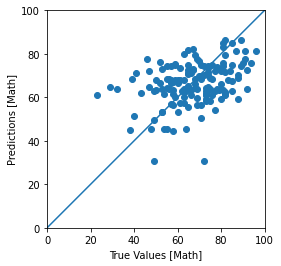

In [131]:
a = plt.axes(aspect='equal')
plt.scatter(test_labels.transpose()[0], test_predictions.transpose()[0])
plt.xlabel('True Values [Math]')
plt.ylabel('Predictions [Math]')
lims = [0, 100]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

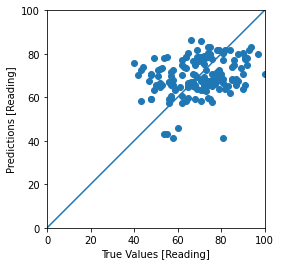

In [132]:
a = plt.axes(aspect='equal')
plt.scatter(test_labels.transpose()[1], test_predictions.transpose()[1])
plt.xlabel('True Values [Reading]')
plt.ylabel('Predictions [Reading]')
lims = [0, 100]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

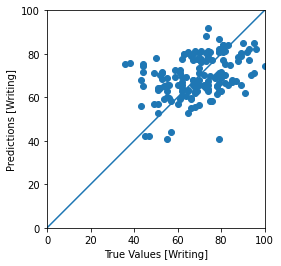

In [133]:
a = plt.axes(aspect='equal')
plt.scatter(test_labels.transpose()[2], test_predictions.transpose()[2])
plt.xlabel('True Values [Writing]')
plt.ylabel('Predictions [Writing]')
lims = [0, 100]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)